<a href="https://colab.research.google.com/github/MuhRizkiP/Tugas-Sains-Data/blob/main/regresi_typeshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- SEL 1: INSTALASI PUSTAKA ---

!pip install pandas numpy scikit-learn matplotlib seaborn joblib streamlit pyngrok -q
print("Semua pustaka berhasil diinstal!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.6 MB/s eta 0:00:00
Semua pustaka berhasil diinstal!


In [ ]:
# --- SEL 2: IMPOR PUSTAKA ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    roc_curve,
    auc
)
import joblib
import io
import os

print("Semua modul berhasil diimpor.")

Semua modul berhasil diimpor.


In [ ]:
# --- SEL 3: TAHAP 1-3 (DATA PREPARATION) ---

print("Memulai Tahap CRISP-DM 1-3: Data Preparation...")

# 1. Simulasi Dataset (123 baris)
np.random.seed(42)
n_samples = 123
data = []
for _ in range(n_samples):
    mat = np.random.randint(70, 95)
    bio = np.random.randint(70, 95)
    fis = np.random.randint(70, 95)

    # Terapkan aturan logika dari paper (Gambar 2)
    if mat <= 79.5:
        jurusan = "IPS"
    elif bio <= 78.5:
        jurusan = "IPS"
    elif fis <= 79.0:
        jurusan = "IPS"
    else:
        jurusan = "IPA"

    # Tambah noise agar data tidak sempurna
    if np.random.rand() < 0.1:
        jurusan = "IPA" if jurusan == "IPS" else "IPS"

    data.append({
        "Attitude": np.random.choice(["A", "B", "C"], p=[0.2, 0.7, 0.1]),
        "Bahasa_Indonesia": np.random.randint(75, 95),
        "Matematika": mat,
        "Biologi": bio,
        "Fisika": fis,
        "Geografi": np.random.randint(75, 95),
        "Jurusan": jurusan
    })

df = pd.DataFrame(data)

# 2. Tambah & Hapus Duplikat (sesuai paper )
df = pd.concat([df, df.head(5)], ignore_index=True)
print(f"Data awal dibuat (dengan duplikat): {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Data setelah hapus duplikat: {df.shape}")

# 3. Label Encoding (sesuai paper )
le_attitude = LabelEncoder()
le_jurusan = LabelEncoder()
df_processed = df.copy()
df_processed['Attitude'] = le_attitude.fit_transform(df['Attitude'])
df_processed['Jurusan'] = le_jurusan.fit_transform(df['Jurusan'])

print("\nContoh data setelah encoding:")
print(df_processed.head())

# 4. Pemisahan Data (80% train, 20% test )
features = ['Attitude', 'Bahasa_Indonesia', 'Matematika', 'Biologi', 'Fisika', 'Geografi']
target = 'Jurusan'
X = df_processed[features]
y = df_processed[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData Latih: {X_train.shape[0]} baris")
print(f"Data Uji: {X_test.shape[0]} baris")
print("--- [Tahap Data Preparation Selesai] ---")

Memulai Tahap CRISP-DM 1-3: Data Preparation...
Data awal dibuat (dengan duplikat): (128, 7)
Data setelah hapus duplikat: (123, 7)

Contoh data setelah encoding:
   Attitude  Bahasa_Indonesia  Matematika  Biologi  Fisika  Geografi  Jurusan
0         1                81          76       89      84        93        1
1         1                77          92       80      80        76        0
2         2                75          93       81      75        86        0
3         1                84          91       81      94        90        0
4         2                77          84       84      88        79        0

Data Latih: 98 baris
Data Uji: 25 baris
--- [Tahap Data Preparation Selesai] ---


In [ ]:
# --- SEL 4: TAHAP 4 (MODELING) ---

print("Memulai Tahap CRISP-DM 4: Modeling...")

# Kita gunakan criterion='entropy' untuk Information Gain
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,  # Batasi kedalaman agar mirip Gambar 2
    random_state=42
)

# Latih model
model.fit(X_train, y_train)

print("Model Decision Tree berhasil dilatih.")

Memulai Tahap CRISP-DM 4: Modeling...
Model Decision Tree berhasil dilatih.


Menampilkan visualisasi Pohon Keputusan...


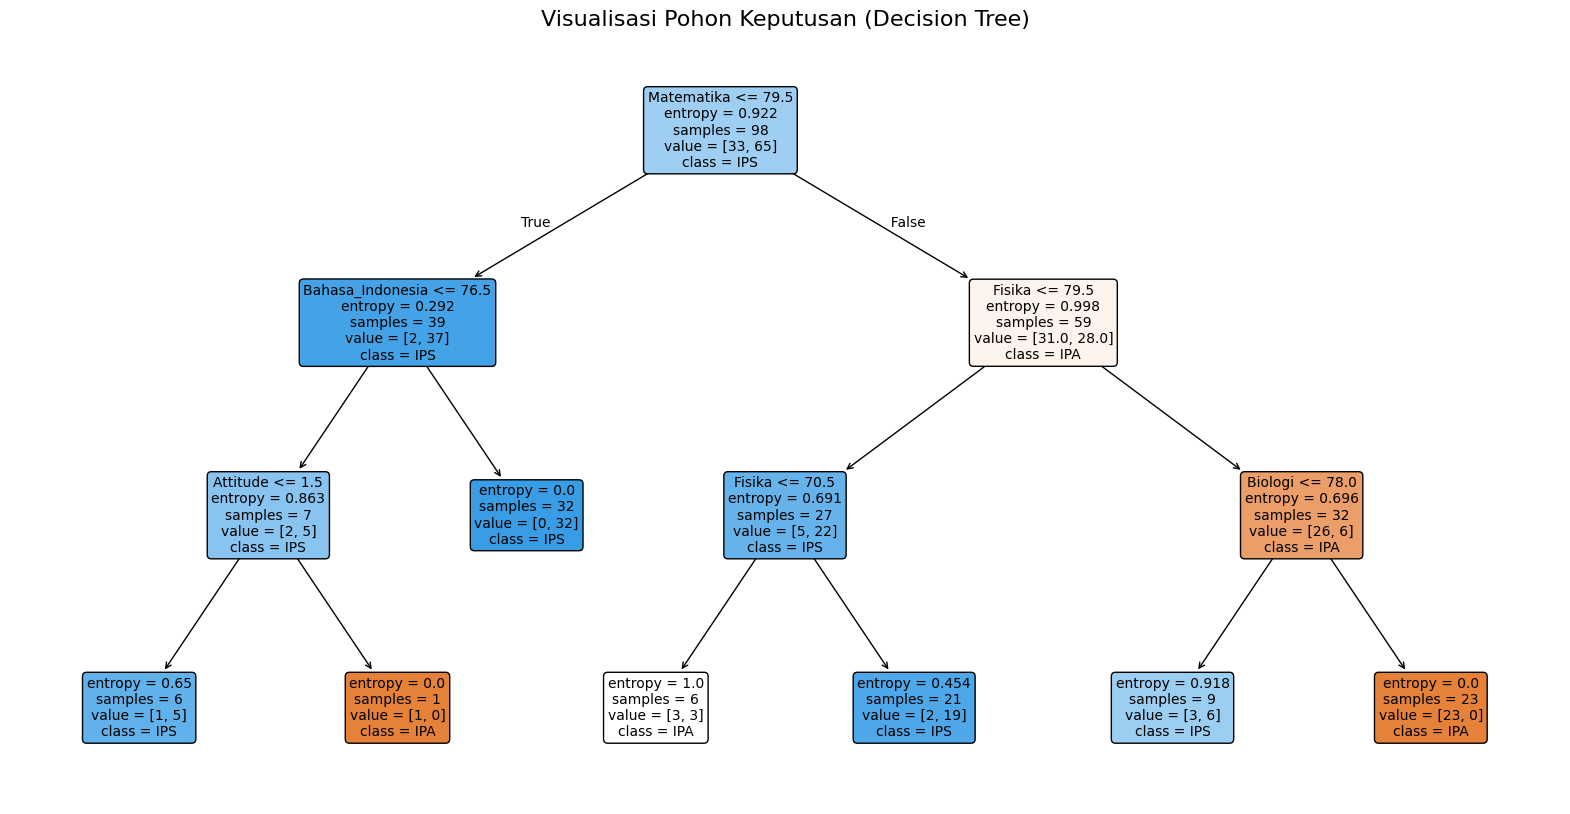

In [ ]:
# --- SEL 5: VISUALISASI MODEL (BAGIAN DARI TAHAP 4) ---

print("Menampilkan visualisasi Pohon Keputusan...")
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=features,
    class_names=le_jurusan.classes_,  # Tampilkan nama (IPA/IPS)
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Pohon Keputusan (Decision Tree)", fontsize=16)
plt.show()

In [ ]:
# --- SEL 6: TAHAP 5 (EVALUATION - METRIK) ---

print("Memulai Tahap CRISP-DM 5: Evaluation...")

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilitas kelas 'IPA'

# Hitung Metrik
accuracy = accuracy_score(y_test, y_pred)
# Kita ukur presisi & recall untuk kelas 'IPA'
precision = precision_score(y_test, y_pred, pos_label=le_jurusan.transform(['IPA'])[0])
recall = recall_score(y_test, y_pred, pos_label=le_jurusan.transform(['IPA'])[0])

print(f"Evaluasi Model (Target: IPA):")
# Hasil paper: Akurasi 96%, Presisi 100%, Recall 95%
print(f"  Akurasi  : {accuracy * 100:.2f}%")
print(f"  Presisi  : {precision * 100:.2f}%")
print(f"  Recall   : {recall * 100:.2f}%")

Memulai Tahap CRISP-DM 5: Evaluation...
Evaluasi Model (Target: IPA):
  Akurasi  : 88.00%
  Presisi  : 87.50%
  Recall   : 77.78%


Menampilkan Confusion Matrix...


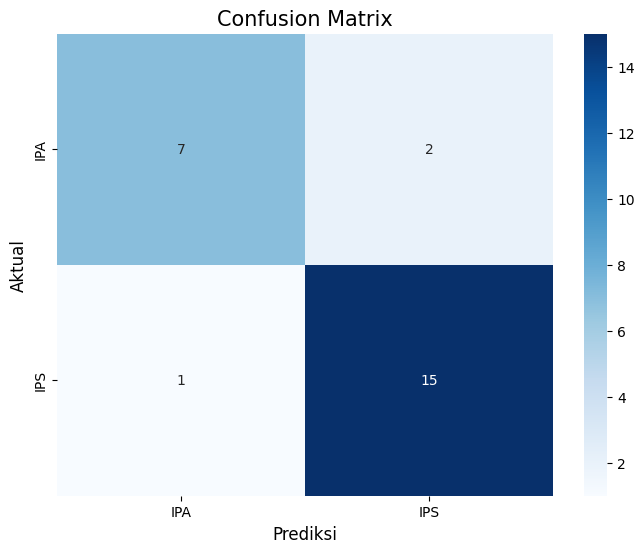

Menampilkan Kurva ROC dan AUC...


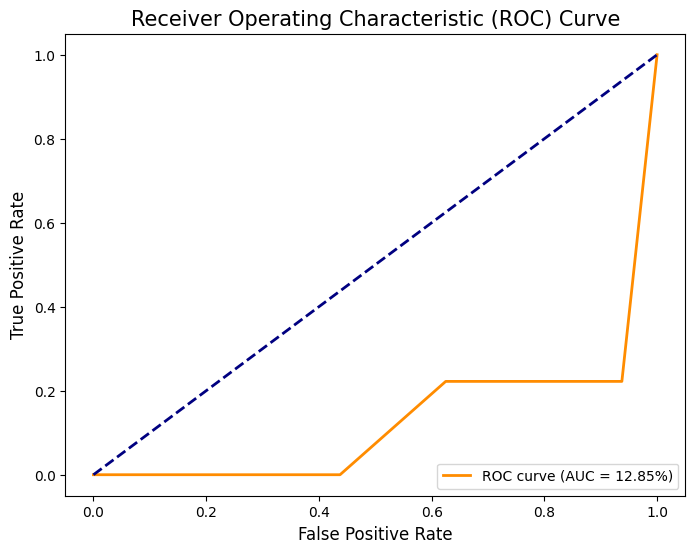

--- [Tahap Evaluation Selesai] ---


In [ ]:
# --- SEL 7: VISUALISASI EVALUASI (BAGIAN DARI TAHAP 5) ---

print("Menampilkan Confusion Matrix...")
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le_jurusan.classes_,
    yticklabels=le_jurusan.classes_
)
plt.xlabel('Prediksi', fontsize=12)
plt.ylabel('Aktual', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

# 2. ROC Curve dan AUC
print("Menampilkan Kurva ROC dan AUC...")
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=le_jurusan.transform(['IPA'])[0])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
# Hasil paper: AUC 97%
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc * 100:.2f}%)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
plt.legend(loc="lower right")
plt.show()

print("--- [Tahap Evaluation Selesai] ---")

In [ ]:
# --- SEL 8: PENYIMPANAN MODEL (PERSIAPAN TAHAP 6) ---

print("Menyimpan model dan encoder...")
joblib.dump(model, 'model_peminatan.joblib')
joblib.dump(le_attitude, 'encoder_attitude.joblib')
joblib.dump(le_jurusan, 'encoder_jurusan.joblib')

print("File berhasil disimpan:")
print("- model_peminatan.joblib")
print("- encoder_attitude.joblib")
print("- encoder_jurusan.joblib")

Menyimpan model dan encoder...
File berhasil disimpan:
- model_peminatan.joblib
- encoder_attitude.joblib
- encoder_jurusan.joblib


In [ ]:
%%writefile app.py
# --- SEL 9: TAHAP 6 (DEPLOYMENT - TULIS FILE 'app.py') ---

import streamlit as st
import pandas as pd
import joblib
import io
import warnings

# --- Konfigurasi Halaman ---
st.set_page_config(
    page_title="Prediksi Peminatan Siswa",
    page_icon="🎓",
    layout="wide"
)

# --- Fungsi Helper untuk Download Excel ---
@st.cache_data
def to_excel(df):
    output = io.BytesIO()
    with pd.ExcelWriter(output, engine='openpyxl') as writer:
        df.to_excel(writer, index=False, sheet_name='Hasil_Prediksi')
    processed_data = output.getvalue()
    return processed_data

# --- Fungsi untuk Memuat Model ---
@st.cache_resource
def load_model():
    try:
        model = joblib.load('model_peminatan.joblib')
        le_attitude = joblib.load('encoder_attitude.joblib')
        le_jurusan = joblib.load('encoder_jurusan.joblib')
        return model, le_attitude, le_jurusan
    except FileNotFoundError:
        return None, None, None

# --- Judul Aplikasi ---
st.title("🎓 Prediksi Peminatan SMA")
st.markdown("Replikasi penelitian Handoko, dkk. untuk memprediksi jurusan IPA/IPS.")

# --- Memuat Model ---
model, le_attitude, le_jurusan = load_model()

if model is None:
    st.error("Gagal memuat file model. Pastikan file .joblib ada.")
    st.stop()
else:
    # Notifikasi model berhasil dimuat (seperti Gambar 4)
    st.success("Model Decision Tree berhasil dimuat!")

# --- Petunjuk Kolom ---
with st.expander("Klik untuk melihat kolom yang dibutuhkan"):
    st.markdown("""
    Pastikan file Excel atau CSV Anda memiliki kolom:
    - **Attitude** ('A', 'B', atau 'C')
    - **Bahasa_Indonesia** (Nilai)
    - **Matematika** (Nilai)
    - **Biologi** (Nilai)
    - **Fisika** (Nilai)
    - **Geografi** (Nilai)
    """)

# --- Bagian Upload File (seperti Gambar 4 [cite: 282]) ---
uploaded_file = st.file_uploader(
    "Upload File Excel (.xlsx) atau CSV (.csv)",
    type=["xlsx", "csv"]
)

if uploaded_file is not None:
    try:
        if uploaded_file.name.endswith('.xlsx'):
            df_upload = pd.read_excel(uploaded_file)
        else:
            df_upload = pd.read_csv(uploaded_file)

        # Tampilkan data (seperti Gambar 5 [cite: 287])
        st.subheader("Data yang Diunggah")
        st.dataframe(df_upload.head())

        df_predict = df_upload.copy()

        # --- Preprocessing Data Upload ---
        required_features = ['Attitude', 'Bahasa_Indonesia', 'Matematika', 'Biologi', 'Fisika', 'Geografi']

        if not all(col in df_predict.columns for col in required_features):
            st.error(f"File tidak memiliki semua kolom yang dibutuhkan: {required_features}")
        else:
            try:
                df_predict['Attitude'] = le_attitude.transform(df_predict['Attitude'])
            except ValueError as e:
                st.error(f"Error encoding 'Attitude': {e}. Pastikan nilainya 'A', 'B', atau 'C'.")
                st.stop()

            # --- Jalankan Prediksi ---
            if st.button("Jalankan Prediksi", type="primary"):
                with st.spinner("Sedang memproses..."):
                    X_new = df_predict[required_features]
                    pred_encoded = model.predict(X_new)
                    pred_labels = le_jurusan.inverse_transform(pred_encoded)

                    df_result = df_upload.copy()
                    df_result['Prediksi_Jurusan'] = pred_labels

                    # Tampilkan hasil (seperti Gambar 6 [cite: 388])
                    st.subheader("✔ Hasil Prediksi")
                    st.dataframe(df_result)

                    # --- Tombol Download (seperti Gambar 6 [cite: 387]) ---
                    excel_data = to_excel(df_result)
                    st.download_button(
                        label="📥 Download Hasil Prediksi (Excel)",
                        data=excel_data,
                        file_name="hasil_prediksi_peminatan.xlsx"
                    )

    except Exception as e:
        st.error(f"Terjadi kesalahan: {e}")

Writing app.py


In [ ]:
# --- SEL 10: JALANKAN APLIKASI STREAMLIT DENGAN NGROK ---

from pyngrok import ngrok

# 1. Tambahkan Authtoken Anda di sini
ngrok.set_auth_token("2wzY8pbb9NqqHwAOmzGfNOGbH5x_6BU8knQT3hkthDggJAGJ")

print("Token Autentikasi NGROK berhasil ditambahkan.")
print("Menjalankan Streamlit di background...")
!streamlit run app.py &>/dev/null&

print("Membuat tunnel ngrok...")
try:
    # 2. Buat tunnel publik ke port 8501
    public_url = ngrok.connect(8501)
    print("Aplikasi Streamlit Anda siap!")
    print(f"Klik URL ini untuk membukanya: {public_url}")
except Exception as e:
    print(f"Error saat menjalankan ngrok: {e}")

Token Autentikasi NGROK berhasil ditambahkan.
Menjalankan Streamlit di background...
Membuat tunnel ngrok...
Aplikasi Streamlit Anda siap!
Klik URL ini untuk membukanya: NgrokTunnel: "https://db02028290e5.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# --- SEL 11: MEMBUAT FILE CSV UNTUK DIUPLOAD ---

# Kita menggunakan DataFrame 'df' yang kita buat di Sel 3
# 'df' ini berisi data asli sebelum di-encoding
if 'df' in locals():
    df.to_csv('data_siswa_untuk_prediksi.csv', index=False)
    print("File 'data_siswa_untuk_prediksi.csv' berhasil dibuat!")
    print("Anda sekarang bisa mengunduhnya dari panel file di sebelah kiri.")
else:
    print("Error: DataFrame 'df' tidak ditemukan.")
    print("Pastikan Anda sudah menjalankan 'Sel 3' terlebih dahulu.")

File 'data_siswa_untuk_prediksi.csv' berhasil dibuat!
Anda sekarang bisa mengunduhnya dari panel file di sebelah kiri.
